# Eli Eating in lab -  mband

Input:
* file name
* Hz
* Path
* Minutes 

output: 
* % of data recived 
* Histogram od the time between samples


In [24]:
from datetime import datetime, timedelta 
import pandas as pd
import numpy as np

left = []
right = []
minutes_r = 18.3
minutes_l = 17.91

participant_r = 'eli-right'
participant_l = 'eli-left'

mband_r_path = './data/Rawan/Right/'
mband_l_path = './data/Rawan/Left/'

r_acc = pd.read_csv( mband_r_path + "Accel18-Mar-2016.csv")
r_acc.Time = pd.to_datetime (r_acc['Time'])

r_gyro = pd.read_csv(mband_r_path + "Gyroscope 18-Mar-2016.csv")
r_gyro.Time = pd.to_datetime (r_gyro['Time'])

r_ambient = pd.read_csv(mband_r_path +"Ambient18-Mar-2016.csv")
r_ambient.Time = pd.to_datetime (r_ambient['Time'])

r_gsr = pd.read_csv(mband_r_path +"GSR 18-Mar-2016.csv")
r_gsr.Time = pd.to_datetime (r_gsr['Time'])

r_heart =pd.read_csv( mband_r_path + "HeartRate 18-Mar-2016.csv")
r_heart.Time = pd.to_datetime (r_heart['Time'])

r_tmp = pd.read_csv(mband_r_path + "SkinTemp 18-Mar-2016.csv")
r_tmp.Time = pd.to_datetime (r_tmp['Time'])



l_acc =pd.read_csv( mband_l_path + "Accel18-Mar-2016.csv")
l_acc.Time = pd.to_datetime (l_acc['Time'])

l_gyro = pd.read_csv(mband_l_path + "Gyroscope 18-Mar-2016.csv")
l_gyro.Time = pd.to_datetime (l_gyro['Time'])

l_ambient = pd.read_csv(mband_l_path +"Ambient18-Mar-2016.csv")
l_ambient.Time = pd.to_datetime (l_ambient['Time'])

l_gsr = pd.read_csv(mband_l_path +"GSR 18-Mar-2016.csv")
l_gsr.Time = pd.to_datetime (l_gsr['Time'])

l_heart = pd.read_csv(mband_l_path + "HeartRate 18-Mar-2016.csv")
l_heart.Time = pd.to_datetime (l_heart['Time'])

l_tmp =pd.read_csv( mband_l_path + "SkinTemp 18-Mar-2016.csv")
l_tmp.Time = pd.to_datetime (l_tmp['Time'])




In [25]:
def calculate(sensor,hz,minutes):
    
    print("Data cuts of after ",(sensor["Time"].iloc[-1] - sensor["Time"].iloc[0]).seconds / 60 , " minutes")
    print ("Percentage of Data Recived: %" + str((sensor.shape[0] / (minutes * 60 * hz))* 100))
    
    
    variations = []
    
    

    for i in range(sensor.shape[0]-1):
        variations.append((sensor["Time"].iloc[i+1]-sensor["Time"].iloc[i]).microseconds)
        
    variations = np.array(variations)
    
    
    %matplotlib inline

    import matplotlib.mlab as mlab
    import matplotlib.pyplot as plt

    num_bins = 50
    # the histogram of the data
    n, bins, patches = plt.hist(variations, num_bins, normed=1, facecolor='green', alpha=0.5)
    #plt.hist(variations)
    plt.show()
    
    return((sensor.shape[0] / (minutes * 60 * hz))* 100)

## Accelerometer

Data cuts of after  18.3  minutes
Percentage of Data Recived: %99.79140960103415


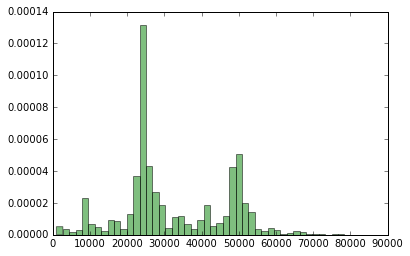

In [26]:
temp = r_acc.loc[r_acc.loc[:,'StudyName']==participant_r]
right.append(calculate(temp,31,minutes_r))

Data cuts of after  3.566666666666667  minutes
Percentage of Data Recived: %19.701254180100022


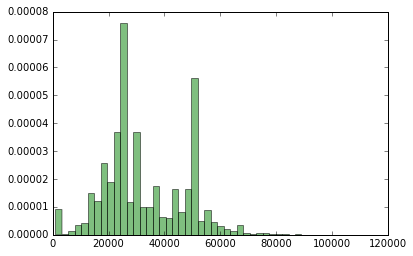

In [27]:
temp = l_acc.loc[l_acc.loc[:,'StudyName']==participant_l]

left.append(calculate(temp,31,minutes_l))

## Gyro

Data cuts of after  3.533333333333333  minutes
Percentage of Data Recived: %19.515138416094814


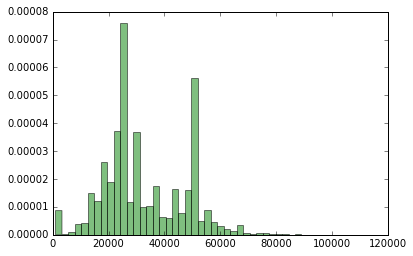

In [28]:
temp = l_gyro.loc[l_gyro.loc[:,'StudyName']==participant_l]
left.append(calculate(temp,31,minutes_l))

Data cuts of after  18.3  minutes
Percentage of Data Recived: %99.78553381514777


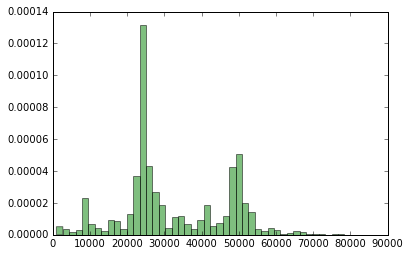

In [29]:
temp = r_gyro.loc[r_gyro.loc[:,'StudyName']==participant_r]
right.append(calculate(temp,31,minutes_r))

## Heart rate

Data cuts of after  18.033333333333335  minutes
Percentage of Data Recived: %101.24697561883494


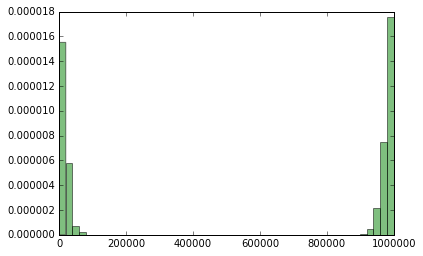

In [30]:
temp = l_heart.loc[l_heart.loc[:,'StudyName']==participant_l]
left.append(calculate(temp,1,minutes_l))

Data cuts of after  18.266666666666666  minutes
Percentage of Data Recived: %100.36429872495447


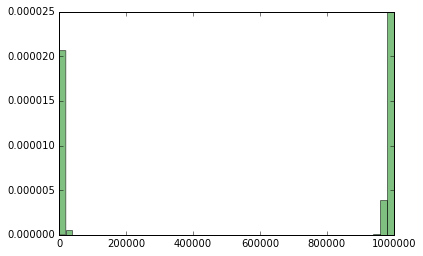

In [31]:
temp = r_heart.loc[r_heart.loc[:,'StudyName']==participant_r]
right.append(calculate(temp,1,minutes_r))

## Skin Temp

Data cuts of after  18.033333333333335  minutes
Percentage of Data Recived: %3.3697632058287796


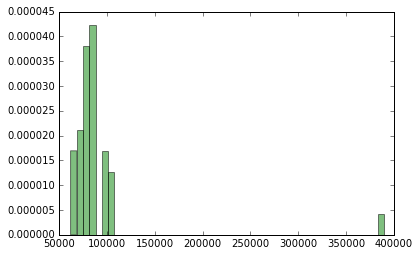

In [32]:
temp = r_tmp.loc[r_tmp.loc[:,'StudyName']==participant_r]
right.append(calculate(temp,1,minutes_r))

Data cuts of after  17.633333333333333  minutes
Percentage of Data Recived: %3.443141634096408


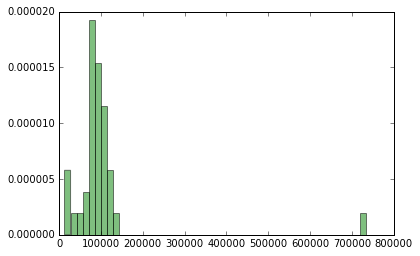

In [33]:
temp = l_tmp.loc[l_tmp.loc[:,'StudyName']==participant_l]
left.append(calculate(temp,1,minutes_l))

## Ambient Light

Data cuts of after  18.066666666666666  minutes
Percentage of Data Recived: %100.9212730318258


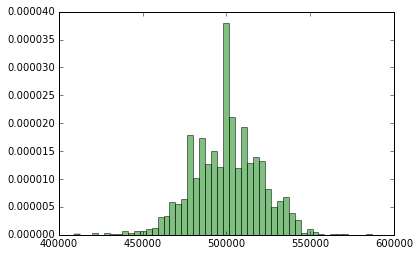

In [34]:
temp = l_ambient.loc[l_ambient.loc[:,'StudyName']==participant_l]
left.append(calculate(temp,2,minutes_l))


Data cuts of after  18.283333333333335  minutes
Percentage of Data Recived: %100.0


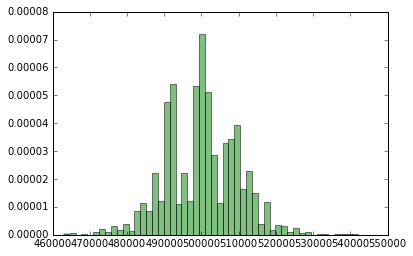

In [35]:
temp = r_ambient.loc[r_ambient.loc[:,'StudyName']==participant_r]
right.append(calculate(temp,2,minutes_r))

## GSR

Data cuts of after  18.166666666666668  minutes
Percentage of Data Recived: %100.18214936247722


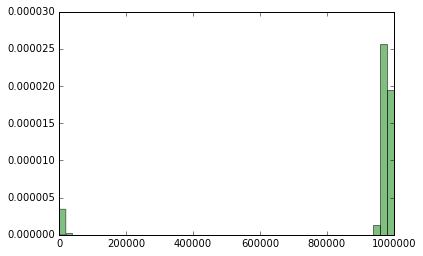

In [36]:
temp = r_gsr.loc[r_gsr.loc[:,'StudyName']==participant_r]
right.append(calculate(temp,0.2,minutes_r))

Data cuts of after  17.916666666666668  minutes
Percentage of Data Recived: %100.9678019728271


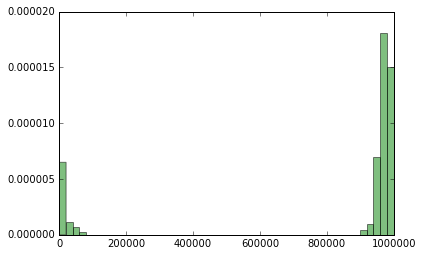

In [37]:
temp = l_gsr.loc[l_gsr.loc[:,'StudyName']==participant_l]
left.append(calculate(temp,0.2,minutes_l))

In [38]:
d = {'right' : pd.Series(right, index=["Acc","Gyro","HeartRate","SkinTemp","Ambient","GSR"]),
              'left' : pd.Series(left, index=["Acc","Gyro","HeartRate","SkinTemp","Ambient","GSR"])}
df = pd.DataFrame(d)

In [39]:
df

,left,right
Acc,19.701254,99.791410
Gyro,19.515138,99.785534
HeartRate,101.246976,100.364299
SkinTemp,3.443142,3.369763
Ambient,100.921273,100.000000
GSR,100.967802,100.182149
